### Project #3: Semi-Supervised vs Unsupervised Topic Modeling 

This project is made as a fullfillment to the course requirement of Omdena School's NLP for Business short course.  

In [1]:
#Libraries were imported to the notebook
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re  # For preprocessing
import pandas as pd  # For data handling
from time import time  # To time our operations
from collections import defaultdict  # For word frequency

import spacy  # For preprocessing
from gensim.models import Word2Vec
import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)
from sklearn.manifold import TSNE
from numpy import dot
from numpy.linalg import norm
import gensim.downloader as gensim_api

#### Importing dataset

In [2]:
#The book was read from Guteberg.org. The title of the book is The Prince by Machiavelli
import urllib
url = "https://www.gutenberg.org/files/1232/1232-0.txt"
file = urllib.request.urlopen(url)
data=[]
for line in file:
    decoded_line = line.decode("utf-8")
    data.append(decoded_line)

for i in data:
    print(i)

﻿The Project Gutenberg eBook of The Prince, by Nicolo Machiavelli



This eBook is for the use of anyone anywhere in the United States and

most other parts of the world at no cost and with almost no restrictions

whatsoever. You may copy it, give it away or re-use it under the terms

of the Project Gutenberg License included with this eBook or online at

www.gutenberg.org. If you are not located in the United States, you

will have to check the laws of the country where you are located before

using this eBook.



Title: The Prince



Author: Nicolo Machiavelli



Translator: W. K. Marriott



Release Date: March, 1998 [eBook #1232]

[Most recently updated: January 2, 2021]



Language: English



Character set encoding: UTF-8



Produced by: John Bickers, David Widger and Others



*** START OF THE PROJECT GUTENBERG EBOOK THE PRINCE ***









The Prince



by Nicolo Machiavelli



Translated by W. K. Marriott





Contents



 INTRODUCTION

 YOUTH Æt. 1-25—1469-94

 OFFICE Æt. 25-

soldiers, but without that cruelty, his other virtues were not

sufficient to produce this effect. And short-sighted writers admire his

deeds from one point of view and from another condemn the principal

cause of them. That it is true his other virtues would not have been

sufficient for him may be proved by the case of Scipio, that most

excellent man, not only of his own times but within the memory of man,

against whom, nevertheless, his army rebelled in Spain; this arose from

nothing but his too great forbearance, which gave his soldiers more

license than is consistent with military discipline. For this he was

upbraided in the Senate by Fabius Maximus, and called the corrupter of

the Roman soldiery. The Locrians were laid waste by a legate of Scipio,

yet they were not avenged by him, nor was the insolence of the legate

punished, owing entirely to his easy nature. Insomuch that someone in

the Senate, wishing to excuse him, said there were many men who knew

much better how 


pressure of Castruccio’s army, owing to his being compelled to leave

his positions before Florence and march on Pisa, in order to suppress a

conspiracy that had been raised against him by Benedetto Lanfranchi,

one of the first men in Pisa, who could not endure that his fatherland

should be under the dominion of the Lucchese. He had formed this

conspiracy, intending to seize the citadel, kill the partisans of

Castruccio, and drive out the garrison. As, however, in a conspiracy

paucity of numbers is essential to secrecy, so for its execution a few

are not sufficient, and in seeking more adherents to his conspiracy

Lanfranchi encountered a person who revealed the design to Castruccio.

This betrayal cannot be passed by without severe reproach to Bonifacio

Cerchi and Giovanni Guidi, two Florentine exiles who were suffering

their banishment in Pisa. Thereupon Castruccio seized Benedetto and put

him to death, and beheaded many other noble citizens, and drove their

families into

In [3]:
#Only the text starting Chapter I to the end of the book was taken to be trained
data=data[550:4829]

#### NLP Pre-Processing

In [4]:
# import nltk library for stop word removal 
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 

[nltk_data] Downloading package stopwords to C:\Users\Amee
[nltk_data]     Ayco\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Amee
[nltk_data]     Ayco\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
# set of stop words
stop_words = set(stopwords.words('english')) 
word_tokens=[]
for i in data:
    tokenized = word_tokenize(i)
    word_tokens.append(tokenized)

for w in word_tokens:
    print(w)

['CHAPTER', 'I', '.']
['HOW', 'MANY', 'KINDS', 'OF', 'PRINCIPALITIES', 'THERE', 'ARE', ',', 'AND', 'BY', 'WHAT', 'MEANS', 'THEY', 'ARE']
['ACQUIRED']
[]
[]
['All', 'states', ',', 'all', 'powers', ',', 'that', 'have', 'held', 'and', 'hold', 'rule', 'over', 'men', 'have', 'been']
['and', 'are', 'either', 'republics', 'or', 'principalities', '.']
[]
['Principalities', 'are', 'either', 'hereditary', ',', 'in', 'which', 'the', 'family', 'has', 'been', 'long']
['established', ';', 'or', 'they', 'are', 'new', '.']
[]
['The', 'new', 'are', 'either', 'entirely', 'new', ',', 'as', 'was', 'Milan', 'to', 'Francesco', 'Sforza', ',', 'or']
['they', 'are', ',', 'as', 'it', 'were', ',', 'members', 'annexed', 'to', 'the', 'hereditary', 'state', 'of', 'the']
['prince', 'who', 'has', 'acquired', 'them', ',', 'as', 'was', 'the', 'kingdom', 'of', 'Naples', 'to', 'that', 'of']
['the', 'King', 'of', 'Spain', '.']
[]
['Such', 'dominions', 'thus', 'acquired', 'are', 'either', 'accustomed', 'to', 'live', 'under

['who', ',', 'being', 'accustomed', 'to', 'live', 'licentiously', 'under', 'Commodus', ',', 'could', 'not']
['endure', 'the', 'honest', 'life', 'to', 'which', 'Pertinax', 'wished', 'to', 'reduce', 'them', ';', 'thus', ',']
['having', 'given', 'cause', 'for', 'hatred', ',', 'to', 'which', 'hatred', 'there', 'was', 'added', 'contempt']
['for', 'his', 'old', 'age', ',', 'he', 'was', 'overthrown', 'at', 'the', 'very', 'beginning', 'of', 'his']
['administration', '.', 'And', 'here', 'it', 'should', 'be', 'noted', 'that', 'hatred', 'is', 'acquired', 'as']
['much', 'by', 'good', 'works', 'as', 'by', 'bad', 'ones', ',', 'therefore', ',', 'as', 'I', 'said', 'before', ',', 'a']
['prince', 'wishing', 'to', 'keep', 'his', 'state', 'is', 'very', 'often', 'forced', 'to', 'do', 'evil', ';', 'for']
['when', 'that', 'body', 'is', 'corrupt', 'whom', 'you', 'think', 'you', 'have', 'need', 'of', 'to', 'maintain']
['yourself—it', 'may', 'be', 'either', 'the', 'people', 'or', 'the', 'soldiers', 'or', 'the',

['king', 'of', 'yours', 'a', 'bad', 'man', 'or', 'a', 'good', 'one', '?', '”', 'asked', 'Castruccio', ',', 'and', 'was', 'told']
['that', 'he', 'was', 'a', 'good', 'one', ',', 'whereupon', 'he', 'said', ',', '“', 'Why', 'should', 'you', 'suggest', 'that']
['I', 'should', 'be', 'afraid', 'of', 'a', 'good', 'man', '?', '”']
[]
['I', 'could', 'recount', 'many', 'other', 'stories', 'of', 'his', 'sayings', 'both', 'witty', 'and']
['weighty', ',', 'but', 'I', 'think', 'that', 'the', 'above', 'will', 'be', 'sufficient', 'testimony', 'to', 'his']
['high', 'qualities', '.', 'He', 'lived', 'forty-four', 'years', ',', 'and', 'was', 'in', 'every', 'way', 'a']
['prince', '.', 'And', 'as', 'he', 'was', 'surrounded', 'by', 'many', 'evidences', 'of', 'his', 'good', 'fortune', ',']
['so', 'he', 'also', 'desired', 'to', 'have', 'near', 'him', 'some', 'memorials', 'of', 'his', 'bad', 'fortune', ';']
['therefore', 'the', 'manacles', 'with', 'which', 'he', 'was', 'chained', 'in', 'prison', 'are', 'to', 'be

In [7]:
filtered_sentence = [] 
for i in word_tokens:  
    for w in i: 
        if w not in stop_words: 
          filtered_sentence.append(w) 
        
print("\n\nOriginal Sentence \n\n")
for i in word_tokens:
    print(" ".join(i)) 



Original Sentence 


CHAPTER I .
HOW MANY KINDS OF PRINCIPALITIES THERE ARE , AND BY WHAT MEANS THEY ARE
ACQUIRED


All states , all powers , that have held and hold rule over men have been
and are either republics or principalities .

Principalities are either hereditary , in which the family has been long
established ; or they are new .

The new are either entirely new , as was Milan to Francesco Sforza , or
they are , as it were , members annexed to the hereditary state of the
prince who has acquired them , as was the kingdom of Naples to that of
the King of Spain .

Such dominions thus acquired are either accustomed to live under a
prince , or to live in freedom ; and are acquired either by the arms of
the prince himself , or of others , or else by fortune or by ability .




CHAPTER II .
CONCERNING HEREDITARY PRINCIPALITIES


I will leave out all discussion on republics , inasmuch as in another
place I have written of them at length , and will address myself only to
principaliti

Venetians , moved , as I believe , by the above reasons , fostered the
Guelph and Ghibelline factions in their tributary cities ; and although
they never allowed them to come to bloodshed , yet they nursed these
disputes amongst them , so that the citizens , distracted by their
differences , should not unite against them . Which , as we saw , did not
afterwards turn out as expected , because , after the rout at Vaila , one
party at once took courage and seized the state . Such methods argue ,
therefore , weakness in the prince , because these factions will never be
permitted in a vigorous principality ; such methods for enabling one the
more easily to manage subjects are only useful in times of peace , but
if war comes this policy proves fallacious .

4 . Without doubt princes become great when they overcome the
difficulties and obstacles by which they are confronted , and therefore
fortune , especially when she desires to make a new prince great , who
has a greater necessity to earn r

In [8]:
print("\n\nFiltered Sentence \n\n")
print(" ".join(filtered_sentence))



Filtered Sentence 


CHAPTER I . HOW MANY KINDS OF PRINCIPALITIES THERE ARE , AND BY WHAT MEANS THEY ARE ACQUIRED All states , powers , held hold rule men either republics principalities . Principalities either hereditary , family long established ; new . The new either entirely new , Milan Francesco Sforza , , , members annexed hereditary state prince acquired , kingdom Naples King Spain . Such dominions thus acquired either accustomed live prince , live freedom ; acquired either arms prince , others , else fortune ability . CHAPTER II . CONCERNING HEREDITARY PRINCIPALITIES I leave discussion republics , inasmuch another place I written length , address principalities . In I keep order indicated , discuss principalities ruled preserved . I say fewer difficulties holding hereditary states , long accustomed family prince , new ones ; sufficient transgress customs ancestors , deal prudently circumstances arise , prince average powers maintain state , unless deprived extraordinary exces

In [9]:
lemma_word = []
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
# v stands for verb, a stands for adjective and n stands for noun
for w in filtered_sentence:
    word1 = wordnet_lemmatizer.lemmatize(w, pos = "n")
    word2 = wordnet_lemmatizer.lemmatize(word1, pos = "v")
    word3 = wordnet_lemmatizer.lemmatize(word2, pos = ("a"))
    lemma_word.append(word3)
print(lemma_word)

[nltk_data] Downloading package wordnet to C:\Users\Amee
[nltk_data]     Ayco\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['CHAPTER', 'I', '.', 'HOW', 'MANY', 'KINDS', 'OF', 'PRINCIPALITIES', 'THERE', 'ARE', ',', 'AND', 'BY', 'WHAT', 'MEANS', 'THEY', 'ARE', 'ACQUIRED', 'All', 'state', ',', 'power', ',', 'hold', 'hold', 'rule', 'men', 'either', 'republic', 'principality', '.', 'Principalities', 'either', 'hereditary', ',', 'family', 'long', 'establish', ';', 'new', '.', 'The', 'new', 'either', 'entirely', 'new', ',', 'Milan', 'Francesco', 'Sforza', ',', ',', ',', 'member', 'annex', 'hereditary', 'state', 'prince', 'acquire', ',', 'kingdom', 'Naples', 'King', 'Spain', '.', 'Such', 'dominion', 'thus', 'acquire', 'either', 'accustom', 'live', 'prince', ',', 'live', 'freedom', ';', 'acquire', 'either', 'arm', 'prince', ',', 'others', ',', 'else', 'fortune', 'ability', '.', 'CHAPTER', 'II', '.', 'CONCERNING', 'HEREDITARY', 'PRINCIPALITIES', 'I', 'leave', 'discussion', 'republic', ',', 'inasmuch', 'another', 'place', 'I', 'write', 'length', ',', 'address', 'principality', '.', 'In', 'I', 'keep', 'order', 'indica

In [10]:
sent = [row.split(' ') for row in lemma_word]
sent

[['CHAPTER'],
 ['I'],
 ['.'],
 ['HOW'],
 ['MANY'],
 ['KINDS'],
 ['OF'],
 ['PRINCIPALITIES'],
 ['THERE'],
 ['ARE'],
 [','],
 ['AND'],
 ['BY'],
 ['WHAT'],
 ['MEANS'],
 ['THEY'],
 ['ARE'],
 ['ACQUIRED'],
 ['All'],
 ['state'],
 [','],
 ['power'],
 [','],
 ['hold'],
 ['hold'],
 ['rule'],
 ['men'],
 ['either'],
 ['republic'],
 ['principality'],
 ['.'],
 ['Principalities'],
 ['either'],
 ['hereditary'],
 [','],
 ['family'],
 ['long'],
 ['establish'],
 [';'],
 ['new'],
 ['.'],
 ['The'],
 ['new'],
 ['either'],
 ['entirely'],
 ['new'],
 [','],
 ['Milan'],
 ['Francesco'],
 ['Sforza'],
 [','],
 [','],
 [','],
 ['member'],
 ['annex'],
 ['hereditary'],
 ['state'],
 ['prince'],
 ['acquire'],
 [','],
 ['kingdom'],
 ['Naples'],
 ['King'],
 ['Spain'],
 ['.'],
 ['Such'],
 ['dominion'],
 ['thus'],
 ['acquire'],
 ['either'],
 ['accustom'],
 ['live'],
 ['prince'],
 [','],
 ['live'],
 ['freedom'],
 [';'],
 ['acquire'],
 ['either'],
 ['arm'],
 ['prince'],
 [','],
 ['others'],
 [','],
 ['else'],
 ['fortune'],


In [11]:
## Train the genisim word2vec model with our own custom corpus
model = Word2Vec(sent, min_count=1,workers=3, window =3, sg = 1)

INFO - 20:40:47: collecting all words and their counts
INFO - 20:40:47: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 20:40:47: PROGRESS: at sentence #10000, processed 10000 words, keeping 2037 word types
INFO - 20:40:47: PROGRESS: at sentence #20000, processed 20000 words, keeping 3180 word types
INFO - 20:40:47: collected 3908 word types from a corpus of 27355 raw words and 27355 sentences
INFO - 20:40:47: Creating a fresh vocabulary
INFO - 20:40:47: Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 3908 unique words (100.0%% of original 3908, drops 0)', 'datetime': '2022-03-06T20:40:47.727606', 'gensim': '4.1.2', 'python': '3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22000-SP0', 'event': 'prepare_vocab'}
INFO - 20:40:47: Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 27355 word corpus (100.0%% of original 27355, drops 0)', 'datetime': '2022-03-06T20:40:47.729609', 'gensim':

In [12]:
model.corpus_total_words

27355

In [13]:
vocab = list(model.wv.key_to_index)
print(vocab)

[',', '.', ';', 'one', 'prince', 'I', 'would', 'men', 'make', 'Castruccio', 'And', 'take', 'time', 'people', 'state', '”', '“', 'great', 'say', ']', '[', 'ought', ':', 'arm', 'others', 'good', 'keep', 'come', 'many', 'The', 'find', 'may', 'give', 'always', 'become', 'hold', 'wish', 'see', 'way', 'fear', 'He', 'man', 'know', 'could', 'much', 'But', 'either', 'consider', 'army', 'without', 'new', 'enemy', 'never', 'force', 'Florentines', 'thing', 'duke', 'order', 'first', 'necessary', '’', 'soldier', 'long', 'also', 'friend', 'two', 'able', 'follow', 'Italy', 'fortune', 'leave', 'This', 'reason', 'cause', 'well', 'city', 'every', 'send', 'subject', 'difficulty', 'power', 'therefore', 'attack', 'bring', 'country', 'go', 'King', 'Lucca', 'war', 'show', 'upon', 'principality', 'hand', 'die', 'yet', 'appear', 'Therefore', 'Alexander', 'lose', 'thus', 'France', 'It', 'Messer', 'another', 'rule', 'acquire', 'whilst', 'afterwards', 'although', 'bear', 'turn', '1', 'might', 'Pisa', 'ruin', 'oppo

<IPython.core.display.Javascript object>


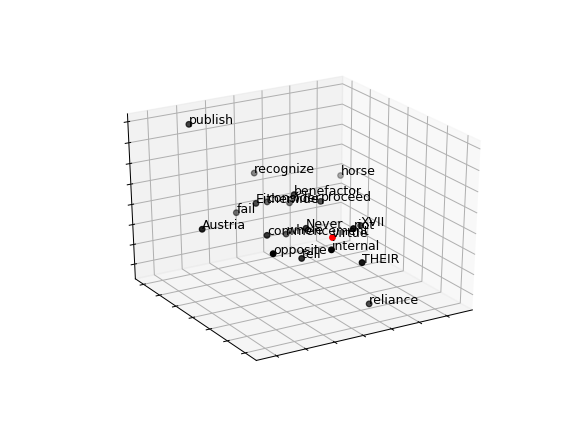

In [14]:
fig = plt.figure()
## word embedding
word= "virtue"
tot_words = [word] + [tupla[0] for tupla in 
                 model.wv.most_similar(word, topn=20)]
X = model.wv[tot_words]
## pca to reduce dimensionality from 300 to 3
pca = TSNE(perplexity=40, n_components=3, init='pca')
X = pca.fit_transform(X)
## create dtf
dtf_ = pd.DataFrame(X, index=tot_words, columns=["x","y","z"])
dtf_["input"] = 0
dtf_["input"].iloc[0:1] = 1
## plot 3d
from mpl_toolkits.mplot3d import Axes3D
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dtf_[dtf_["input"]==0]['x'], 
           dtf_[dtf_["input"]==0]['y'], 
           dtf_[dtf_["input"]==0]['z'], c="black")
ax.scatter(dtf_[dtf_["input"]==1]['x'], 
           dtf_[dtf_["input"]==1]['y'], 
           dtf_[dtf_["input"]==1]['z'], c="red")
ax.set(xlabel=None, ylabel=None, zlabel=None, xticklabels=[], 
       yticklabels=[], zticklabels=[])
for label, row in dtf_[["x","y","z"]].iterrows():
    x, y, z = row
    ax.text(x, y, z, s=label)
plt.show()

In [17]:
model.wv['virtue']

array([ 0.00691177, -0.00356514,  0.00740314,  0.00219992, -0.00313169,
        0.00819125, -0.00206948, -0.00185673,  0.00020419,  0.00724046,
       -0.00379914, -0.00734002, -0.00097804,  0.00831774,  0.00098001,
       -0.00115992,  0.00639681,  0.004602  ,  0.00800484,  0.00093064,
       -0.00231794,  0.00057649, -0.00205549,  0.00716086,  0.00870422,
       -0.00608089,  0.00770291, -0.00918768, -0.0018038 , -0.00433493,
       -0.0069969 , -0.00215218,  0.00303671,  0.00215231, -0.00594576,
        0.00724147, -0.00739885, -0.00496568, -0.00896542,  0.0041761 ,
        0.00834321, -0.00698239,  0.00470009,  0.00534492, -0.00675348,
        0.00729944, -0.00426187, -0.00636371, -0.00711755,  0.0011607 ,
        0.00868873,  0.00288329, -0.00181645,  0.00534097, -0.00016492,
       -0.00295334,  0.00888126, -0.00557949, -0.0096112 ,  0.00765715,
       -0.00187524,  0.00576571,  0.0097824 , -0.00578217, -0.00195812,
        0.00565247,  0.00080809, -0.00623584, -0.00864932,  0.00

In [18]:
!pip install corextopic

You should consider upgrading via the 'c:\users\amee ayco\anaconda3\python.exe -m pip install --upgrade pip' command.


In [19]:
import scipy.sparse as ss

import corextopic.corextopic as ct
import corextopic.vis_topic as vt # jupyter notebooks will complain matplotlib is being loaded twice

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer

%matplotlib inline

In [20]:
# Transform 20 newsgroup data into a sparse matrix
vectorizer = CountVectorizer(stop_words='english', max_features=20000, binary=True)
doc_word = vectorizer.fit_transform(lemma_word)
doc_word = ss.csr_matrix(doc_word)

doc_word.shape # n_docs x m_words

(27355, 3390)

In [21]:
# Get words that label the columns (needed to extract readable topics and make anchoring easier)
words = list(np.asarray(vectorizer.get_feature_names()))

In [22]:
not_digit_inds = [ind for ind,word in enumerate(words) if not word.isdigit()]
doc_word = doc_word[:,not_digit_inds]
words    = [word for ind,word in enumerate(words) if not word.isdigit()]

doc_word.shape # n_docs x m_words

(27355, 3324)

In [23]:
# Train the CorEx topic model with 50 topics
topic_model = ct.Corex(n_hidden=50, words=words, max_iter=200, verbose=False, seed=1)
topic_model.fit(doc_word, words=words);

In [24]:
# Print a single topic from CorEx topic model
topic_model.get_topics(topic=1, n_words=10)

[('government', 0.0008277862205406975, 1.0),
 ('self', 0.00013276345663034187, 1.0),
 ('practise', 5.5951198468135826e-05, 1.0),
 ('warn', 5.504753376773733e-05, 1.0),
 ('reward', 3.5685069510121246e-05, 1.0),
 ('dead', 3.090878321023927e-05, -1.0),
 ('horseback', 2.9146354164174694e-05, 1.0),
 ('credit', 2.5801457425410178e-05, 1.0),
 ('door', 2.5476618208661886e-05, -1.0),
 ('governor', 2.542085054496051e-05, -1.0)]

In [25]:
# Print all topics from the CorEx topic model
topics = topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_,_ = zip(*topic)
    print('{}: '.format(n) + ', '.join(topic_words))

0: arms, ill, retreat, seeing, citizens, fellow, bow, non, observance, pre
1: government, self, practise, warn, reward, dead, horseback, credit, door, governor
2: far, bentivogli, destruction, conduct, particularly, satisfy, fermians, esteem, baglioni, closely
3: law, brother, start, ride, beautiful, germans, despoil, sforza, whilst, neutral
4: like, woman, arrange, thou, contro, strange, foothold, generous, uguccione, come
5: cavalry, having, disorder, method, servant, frenchmen, array, estate, xi, malcontent
6: short, remain, adherent, phrase, time, boldly, securely, humanity, decline, midst
7: life, work, quite, dare, employ, mount, manifest, dal, preservation, legitimate
8: everybody, country, feast, administration, firstly, sooner, hardship, boy, read, hereditary
9: assistance, florence, readily, fell, stop, preparation, decisive, wholly, noteworthy, tribute
10: men, rapacious, daily, shortness, prevent, true, fourteen, retain, month, avail
11: mean, don, carlo, crown, chief, resi

In [26]:
topic_model.get_topics(topic=5, n_words=10, print_words=False)

[(482, 0.0005945995226827023, 1.0),
 (1431, 0.0003521466688014205, 1.0),
 (922, 3.8187545792353145e-05, 1.0),
 (1903, 3.368317462795769e-05, -1.0),
 (2678, 2.9399507442484267e-05, -1.0),
 (1294, 2.439383638276835e-05, -1.0),
 (205, 2.4063307307966742e-05, 1.0),
 (1091, 2.337059852940845e-05, -1.0),
 (3298, 2.3327689281868767e-05, -1.0),
 (1837, 2.2088253469878003e-05, -1.0)]

In [27]:
print(topic_model.clusters)
print(topic_model.clusters.shape) # m_words

[48 47  3 ... 20 26 37]
(3324,)


In [28]:
# Print a single topic from CorEx topic model
topic_model.get_top_docs(topic=0, n_docs=10, sort_by='log_prob')

NOTE: 'docs' not provided to CorEx. Returning top docs as lists of row indices


[(12377, -9.51017042893909e-13),
 (12725, -9.51017042893909e-13),
 (20577, -9.521272659185342e-13),
 (20530, -9.521272659185342e-13),
 (5542, -9.530154443382344e-13),
 (5296, -9.530154443382344e-13),
 (11271, -9.532374889431594e-13),
 (8308, -9.532374889431594e-13),
 (5513, -9.532374889431594e-13),
 (12344, -9.596767824859853e-13)]

In [29]:
print(topic_model.p_y_given_x.shape) # n_docs x k_topics

(27355, 50)


In [30]:
topic_model.tc

0.00047430792244414807

In [31]:
topic_model.tcs.shape # k_topics

(50,)

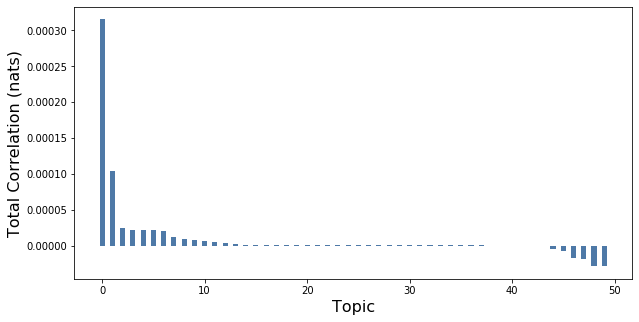

In [32]:
plt.figure(figsize=(10,5))
plt.bar(range(topic_model.tcs.shape[0]), topic_model.tcs, color='#4e79a7', width=0.5)
plt.xlabel('Topic', fontsize=16)
plt.ylabel('Total Correlation (nats)', fontsize=16);

In [33]:
topic_model.log_z.shape # n_docs x k_topics

(27355, 50)

In [34]:
print(np.mean(topic_model.log_z, axis=0))
print(topic_model.tcs)

[ 3.15531446e-04  1.04274252e-04  2.41952184e-05  2.20235683e-05
  2.17838699e-05  2.17330542e-05  2.06941407e-05  1.20116683e-05
  9.42193712e-06  7.58483006e-06  6.50692830e-06  5.09650345e-06
  3.40864404e-06  2.66051232e-06  6.19239047e-07  4.02321126e-07
  3.48381961e-07  3.36778217e-07  3.16138444e-07  2.99920931e-07
  2.98277323e-07  2.97129448e-07  2.70182338e-07  2.63987662e-07
  2.62669507e-07  2.61041709e-07  2.57066254e-07  2.44394294e-07
  2.37985056e-07  2.36621950e-07  2.32117134e-07  2.28117528e-07
  2.24827877e-07  1.94956137e-07  1.93025327e-07  1.89055063e-07
  1.86817205e-07  1.74516881e-07 -1.46049910e-07 -1.89261792e-07
 -6.00063673e-07 -8.76325994e-07 -9.73219294e-07 -1.04292412e-06
 -4.23395370e-06 -7.34183539e-06 -1.73443379e-05 -1.91758711e-05
 -2.81443427e-05 -2.91260341e-05]
[ 3.15531446e-04  1.04274252e-04  2.41952184e-05  2.20235683e-05
  2.17838699e-05  2.17330542e-05  2.06941407e-05  1.20116683e-05
  9.42193712e-06  7.58483006e-06  6.50692830e-06  5.0965

In [35]:
# Train a second layer to the topic model
tm_layer2 = ct.Corex(n_hidden=10)
tm_layer2.fit(topic_model.labels);

# Train a third layer to the topic model
tm_layer3 = ct.Corex(n_hidden=1)
tm_layer3.fit(tm_layer2.labels);

In [36]:
vt.vis_hierarchy([topic_model, tm_layer2, tm_layer3], column_label=words, max_edges=200, prefix='topic-model-example')

weight threshold is 0.000000 for graph with max of 200.000000 edges 


#### Anchoring for Semi-Supervised Topic Modeling

In [38]:
# Anchor 'nasa' and 'space' to first topic, 'sports' and 'stadium' to second topic, so on...
anchor_words = [['politics', 'government'], ['law', 'arms'], ['goodwill', 'hatred'], ['fortune', 'power']]

anchored_topic_model = ct.Corex(n_hidden=50, seed=2)
anchored_topic_model.fit(doc_word, words=words, anchors=anchor_words, anchor_strength=6);

In [39]:
for n in range(len(anchor_words)):
    topic_words,_,_ = zip(*anchored_topic_model.get_topics(topic=n))
    print('{}: '.format(n) + ', '.join(topic_words))

0: government, politics, self, act, conform, irrevocable, proceed, silent
1: law, arms, man, brother, auxiliary, downright, gli, join, popular, presuppose
2: hatred, goodwill, discretion, indebted, matteo, presentiment, reject
3: fortune, power, _i, e_, happened, murders, prince, come, ascent, catholic


In [40]:
# Anchor with single words and groups of words
anchor_words = ['law', ['politics', 'government'], ['law', 'arms'], 'power']

anchored_topic_model = ct.Corex(n_hidden=50, seed=2)
anchored_topic_model.fit(doc_word, words=words, anchors=anchor_words, anchor_strength=6);

In [41]:
for n in range(len(anchor_words)):
    topic_words,_,_ = zip(*anchored_topic_model.get_topics(topic=n))
    print('{}: '.format(n) + ', '.join(topic_words))

0: law, brother, complacent, machiavelli, scheme, victorious
1: government, politics, self, advantageous, convenient, daughter, error
2: law, arms, man, firm, julius, scour, tedious
3: power, _i, e_, happened, murders, acknowledge, birth, carry, confer, gli


#### Project 2: Unsupervised using LDA

In [42]:
# import packages from scikit-learn
from sklearn.decomposition import LatentDirichletAllocation, NMF, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [44]:
vectorizer = CountVectorizer(min_df=5, max_df=0.9, 
                             stop_words='english', lowercase=True, 
                             token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')
data_vectorized = vectorizer.fit_transform(lemma_word)

In [45]:
# Build a Latent Dirichlet Allocation Model
lda_model = LatentDirichletAllocation(n_components= 10, max_iter=10, learning_method='online') # no of components = no. of topics
lda_Z = lda_model.fit_transform(data_vectorized)
print(lda_Z.shape)  # (NO_DOCUMENTS, NO_TOPICS)
 

(27355, 10)


In [47]:
# inspect the inferred topics
def print_topics(model, vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-top_n - 1:-1]])

In [48]:
print("LDA Model:")
print_topics(lda_model, vectorizer)
print("=" * 20)

LDA Model:
Topic 0:
[('prince', 216.6432577176012), ('arm', 81.3034153489768), ('way', 73.81335230046629), ('friend', 58.757751216133826), ('pisa', 44.229212218708064), ('difficulty', 42.6453717320584), ('pagolo', 32.698415436599646), ('cavalry', 32.197436555816466), ('let', 32.096728200050975), ('rule', 29.82358892258581)]
Topic 1:
[('make', 135.8331323036447), ('fortune', 64.89815918923864), ('new', 57.21320422600446), ('war', 43.799653722662725), ('hand', 43.71366123394749), ('infantry', 39.29653007242515), ('kill', 34.09348960810727), ('pope', 31.121166078139417), ('france', 30.820470393085312), ('uguccione', 29.32251169690751)]
Topic 2:
[('men', 168.9373487853697), ('florentines', 77.62889393117545), ('man', 75.23630366295221), ('know', 70.80643370253046), ('force', 57.78648452489936), ('attack', 50.335423714308014), ('cause', 45.72059697136309), ('use', 31.87427900089787), ('happen', 31.553439234265824), ('valour', 29.48932132384057)]
Topic 3:
[('great', 108.70896898746172), ('go